In [2]:
import pandas as pd 
import scanpy as sc
import os

os.chdir("/home/abombin/Mawa/multiplex-analysis-web-apps")

adata = sc.read("input/clust_dat.h5ad")

def find_markers(adata, umap_cur_col):
    sc.tl.rank_genes_groups(adata, umap_cur_col, method="wilcoxon", layer="counts")
    return(adata)
    

adata = find_markers(adata, "Cluster")

def format_de_results(adata):
    gene_names = pd.DataFrame(adata.uns["rank_genes_groups"]["names"])
    gene_pvals = pd.DataFrame(adata.uns["rank_genes_groups"]["pvals"])
    combine_df = pd.DataFrame()
    for i in range(len(gene_names.columns)):
        cur_cluster = gene_names.columns[i]
        cur_names = gene_names.iloc[:, i].to_list()
        cur_pvals = gene_pvals.iloc[:, i].to_list()
        cur_df = pd.DataFrame({"Group":cur_cluster, "Gene": cur_names, "Pval": cur_pvals})
        combine_df = pd.concat([combine_df, cur_df])
    return(combine_df)

de_results = format_de_results(adata)

/home/abombin/miniconda3/envs/mawa-2024-02-08/lib/python3.11/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/abombin/miniconda3/envs/mawa-2024-02-08/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/abombin/miniconda3/envs/mawa-2024-02-08/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/abombin/miniconda3/envs/mawa-2024-02-08/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragme

In [4]:
cluste1 = sc.get.rank_genes_groups_df(adata, group=None)

/home/abombin/miniconda3/envs/mawa-2024-02-08/lib/python3.11/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


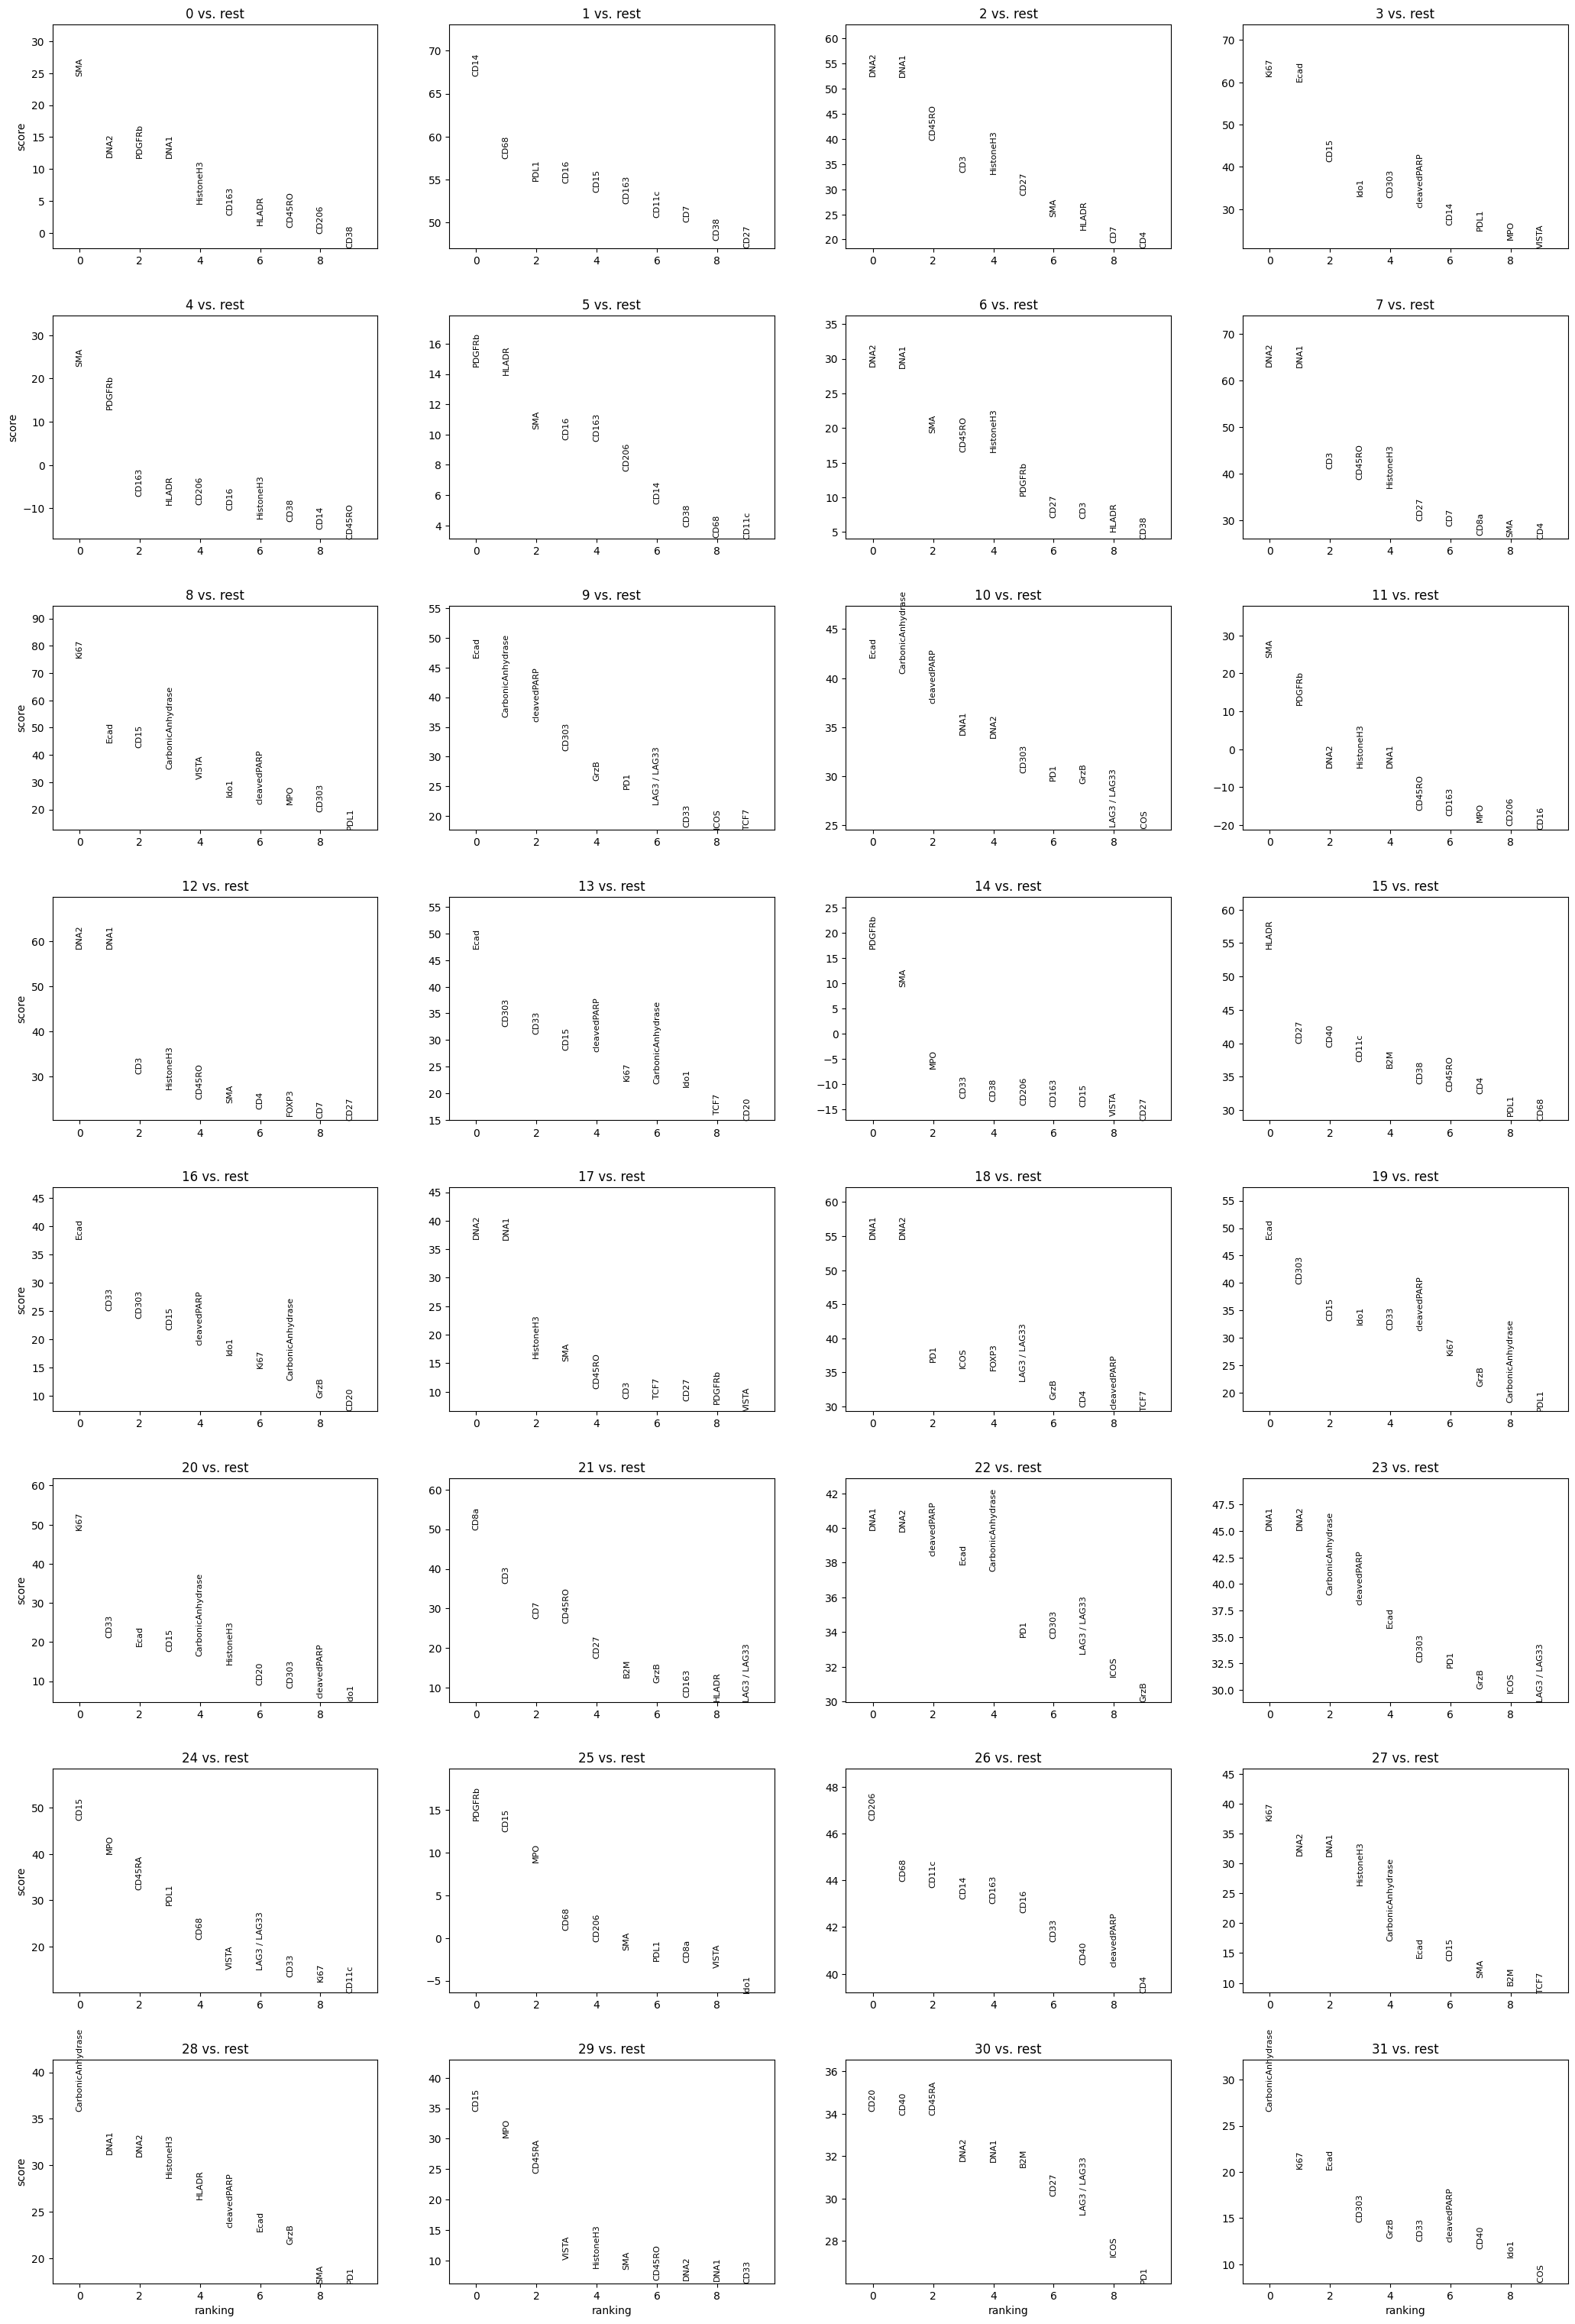

In [7]:
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)